In [68]:
import numpy as np
import pandas as pd
import math
import copy

In [69]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PlayTennis.csv')
X = dataset.iloc[:, 1:].values
print(X)
attribute = ['outlook', 'temp', 'humidity', 'wind']

[['Sunny' 'Hot' 'High' 'Weak' 'No']
 ['Sunny' 'Hot' 'High' 'Strong' 'No']
 ['Overcast' 'Hot' 'High' 'Weak' 'Yes']
 ['Rain' 'Mild' 'High' 'Weak' 'Yes']
 ['Rain' 'Cool' 'Normal' 'Weak' 'Yes']
 ['Rain' 'Cool' 'Normal' 'Strong' 'No']
 ['Overcast' 'Cool' 'Normal' 'Strong' 'Yes']
 ['Sunny' 'Mild' 'High' 'Weak' 'No']
 ['Sunny' 'Cool' 'Normal' 'Weak' 'Yes']
 ['Rain' 'Mild' 'Normal' 'Weak' 'Yes']
 ['Sunny' 'Mild' 'Normal' 'Strong' 'Yes']
 ['Overcast' 'Mild' 'High' 'Strong' 'Yes']
 ['Overcast' 'Hot' 'Normal' 'Weak' 'Yes']
 ['Rain' 'Mild' 'High' 'Strong' 'No']]


In [70]:
class Node(object):
    def __init__(self):
        self.value = None
        self.decision = None
        self.childs = None
 
def findEntropy(data, rows):
    yes = 0
    no = 0
    ans = -1
    idx = len(data[0]) - 1
    entropy = 0
    for i in rows:
        if data[i][idx] == 'Yes':
            yes = yes + 1
        else:
            no = no + 1
 
    x = yes/(yes+no)
    y = no/(yes+no)
    if x != 0 and y != 0:
        entropy = -1 * (x*math.log2(x) + y*math.log2(y))
    if x == 1:
        ans = 1
    if y == 1:
        ans = 0
    return entropy, ans
 
def findMaxGain(data, rows, columns):
    maxGain = 0
    retidx = -1
    entropy, ans = findEntropy(data, rows)
    if entropy == 0:
        """if ans == 1:
            print("Yes")
        else:
            print("No")"""
        return maxGain, retidx, ans
 
    for j in columns:
        mydict = {}
        idx = j
        for i in rows:
            key = data[i][idx]
            if key not in mydict:
                mydict[key] = 1
            else:
                mydict[key] = mydict[key] + 1
        gain = entropy
 
        # print(mydict)
        for key in mydict:
            yes = 0
            no = 0
            for k in rows:
                if data[k][j] == key:
                    if data[k][-1] == 'Yes':
                        yes = yes + 1
                    else:
                        no = no + 1
            # print(yes, no)
            x = yes/(yes+no)
            y = no/(yes+no)
            # print(x, y)
            if x != 0 and y != 0:
                gain += (mydict[key] * (x*math.log2(x) + y*math.log2(y)))/14
        # print(gain)
        if gain > maxGain:
            # print("hello")
            maxGain = gain
            retidx = j
 
    return maxGain, retidx, ans
 
def buildTree(data, rows, columns):
 
    maxGain, idx, ans = findMaxGain(X, rows, columns)
    root = Node()
    root.childs = []
    # print(maxGain
    #
    # )
    if maxGain == 0:
        if ans == 1:
            root.value = 'Yes'
        else:
            root.value = 'No'
        return root
 
    root.value = attribute[idx]
    mydict = {}
    for i in rows:
        key = data[i][idx]
        if key not in mydict:
            mydict[key] = 1
        else:
            mydict[key] += 1
 
    newcolumns = copy.deepcopy(columns)
    newcolumns.remove(idx)
    for key in mydict:
        newrows = []
        for i in rows:
            if data[i][idx] == key:
                newrows.append(i)
        # print(newrows)
        temp = buildTree(data, newrows, newcolumns)
        temp.decision = key
        root.childs.append(temp)
    return root
 
def traverse(root):
    print(root.decision)
    print(root.value)
 
    n = len(root.childs)
    if n > 0:
        for i in range(0, n):
            traverse(root.childs[i])
 
def calculate():
    rows = [i for i in range(0, 14)]
    columns = [i for i in range(0, 4)]
    root = buildTree(X, rows, columns)
    root.decision = 'Start'
    traverse(root)

calculate()


Start
outlook
Sunny
humidity
High
No
Normal
Yes
Overcast
Yes
Rain
wind
Weak
Yes
Strong
No


In [71]:
import numpy as np
import pandas as pd
eps = np.finfo(float).eps
#reading the data from the csv file
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PlayTennis.csv")

In [76]:
#Entropy cho thuộc tính mục tiêu
def find_entropy(df):
    target = df.keys()[-1] #(playGolf)
    entropy = 0
    values = df[target].unique() #yes,no
    for value in values:
        fraction = df[target].value_counts()[value]/len (df[target])
        entropy += -fraction * np.log2(fraction)
    return entropy

In [77]:
def find_entropy_atrribute(df,attribute):
    target = df.key()[-1]
    target_variables = df[target].unique()
  #unique values in target playGolf attribute (Yes,No)
    variables = df[attribute].unique() #Sunny, Overcast, Rainy
  #attribute entropy
  #Variables=[sunny, sunny....5, overcast1....overcast4, Rainy1...Ra5 ]
    entropy2=0
    for variable in variables:
        entropy=0
        for target_variable in target_variables:
            num=len(df[attribute][df[attribute]==variable][df[target]==target_variable])
            den=len(df[attribute][df[attribute]==variable])
            fraction = num/(den+eps)
            entropy+= -fraction*np.log2(fraction+eps)
        fraction2=den/len(df)
        entropy2+=-fraction2*entropy
    return abs(entropy2)

In [78]:
def bestClassifier(df):
  # Entropy_att = []
  # information gain array for all attributes
  IG = []
  # for all attributes excluding target
  for key in df.keys()[:-1]:
      IG.append(find_entropy(df) -find_entropy_atrribute(df, key))
  return df.keys()[:-1][np.argmax(IG)]

In [118]:

data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PlayTennis.csv")
def convert_yes_no(txt):
  if 'yes' in txt:
      return 1
  else:
      return 0
  
  df = pd.get_dummies(df)
  df.windy = df.windy.astype(int)
  df.play = df.play.apply(convert_yes_no)
  X_train = df.loc[:, df.columns != 'play']
  Y_train = df.play
  clf = tree.DecisionTreeClassifier(criterion='entropy')
  clf = clf.fit(X,y)
  plot_decision_tree(clf,X.columns,df.columns[1])  

IndentationError: ignored

In [119]:
from sklearn.datasets import load_iris
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from IPython.display import Image
from io import StringIO
import pydotplus
from sklearn import preprocessing
from sklearn import tree
%matplotlib inline

In [120]:
def plot_decision_tree (clf, feature_name, target_name):
    dot_data = StringIO()
    tree.export_graphviz(clf, out_file=dot_data,
                         feature_names=feature_name, 
                         class_names=target_name, 
                         filled=True, rounded=True, 
                         special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
    return Image(graph.create_png())
X, y = load_iris(return_X_y=True)
iris = load_iris()

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [123]:
df = pd.get_dummies(df)
df.windy = df.windy.astype(int)
df.play = df.play.apply(convert_yes_no)
X_train = df.loc[:, df.columns != 'play']
Y_train = df.play
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
df['outlook'] = Le.fit_transform(df['outlook'])
df['temp'] = Le.fit_transform(df['temp'])
df['humidity'] = Le.fit_transform(df['humidity'])
df['windy'] = Le.fit_transform(df['windy'])
df['play'] = Le.fit_transform(df['play'])
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PlayTennis.csv")

AttributeError: ignored

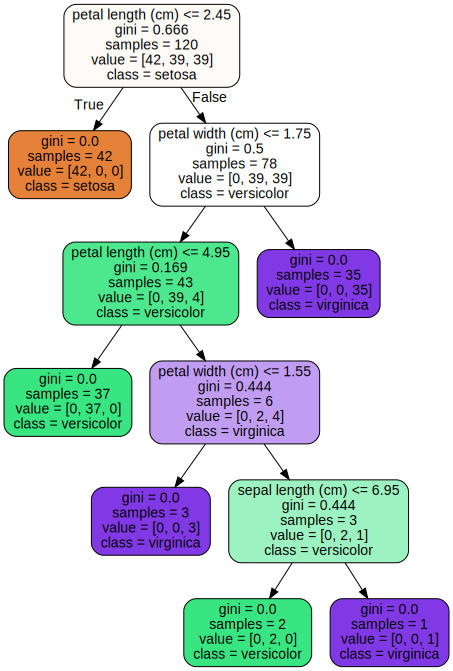

In [60]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=iris.feature_names,class_names=iris.target_names,filled=True,rounded=True)
graph = graphviz.Source(dot_data)
graph